In [217]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [218]:
### InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory
try:
    # Disable all GPUS
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

### Importing the dataset

In [219]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [220]:
category = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [221]:
train_images.shape

(60000, 28, 28)

In [222]:
test_images.shape

(10000, 28, 28)

### Preprocess Data

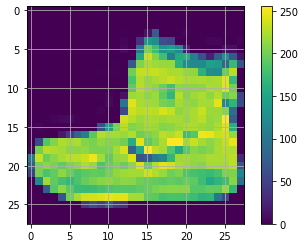

In [223]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [224]:
train_images = train_images / 255.0
test_images = test_images / 255.0

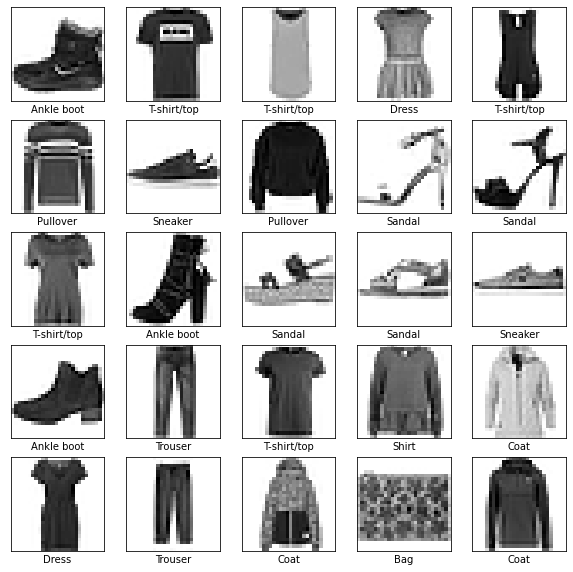

In [225]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(category[train_labels[i]])
plt.show()

### Building the model

In [226]:
# layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [227]:
model.compile(optimizer='adam', metrics=['accuracy'],
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [228]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 903us/step - loss: 0.6336 - accuracy: 0.7795
Epoch 2/10
1875/1875 [==============================] - 2s 910us/step - loss: 0.3823 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.3372 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.3059 - accuracy: 0.8887
Epoch 5/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.2974 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.2752 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.2682 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.2526 - accuracy: 0.9077
Epoch 9/10
1875/1875 [==============================] - 2s 921us/step - loss: 0.2453 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 2s 917u

### Model evaluation

In [229]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3313 - accuracy: 0.8858

Test accuracy: 0.8858000040054321


### Making predictions

In [230]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [231]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(category[predicted_label],
                                100*np.max(predictions_array),
                                category[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

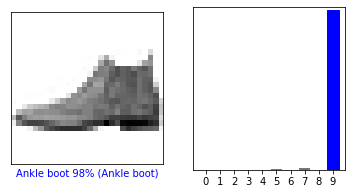

In [232]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

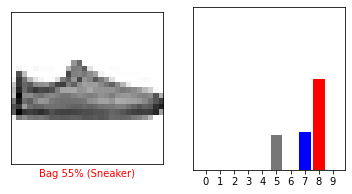

In [233]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

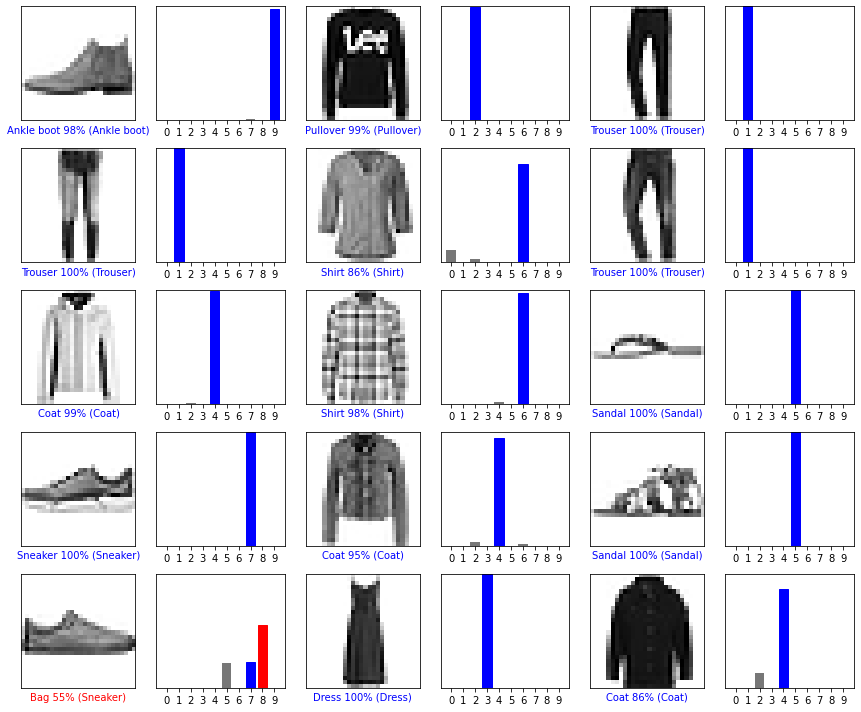

In [234]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()